# Beijing Air-Quality Time Series Project
### Exploratory Data Analysis Notebook


## by Dolci Sanders and Paul Torres

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import prettyplotlib as ppl
from prettyplotlib import brewer2mpl
from pylab import savefig 
from pylab import fill

import glob
from sklearn.model_selection import train_test_split
import pickle

# Styling Guide 

plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 10, n= 12))


## Read in Data from Cleaning Set

In [2]:
train = pd.read_pickle('PKL/train.pkl')
test = pd.read_pickle('PKL/test.pkl')
time = pd.read_pickle('PKL/ALL/time.pkl')

In [3]:
# Set date in time full data frame additional to index 

time['Date'] = pd.to_datetime(time[['year','month','day','hour']])

### Key of Features

PM2.5 - Particulate Matter 2.5 micrometers and smaller (Target Variable)

station - Station where measurements came from (Separate time Series)

## Station

Our data came from 12 reporting stations. Here our data is visualized to see what stations are reporting higher levels of PM2.5 

Huairou, Changping, and Dingling have the three lowest reportings. 
Wan Shou Xin Gong, Dongsi, and Gucheng/Nongzhanguan have the four highest reportings.


## Levels of PM 2.5 by Year plotted by Observation Station/Site

First we looked at the Particulate Matter (2.5) by year for each station, breaking that up into the highest and lowest stations. 
Next we looked at the combined PM2.5 for all of Beijing. 

We can see that the PM 2.5 levels seem to be going down even amont the highest station sights, and that shows well on the combined plot. 

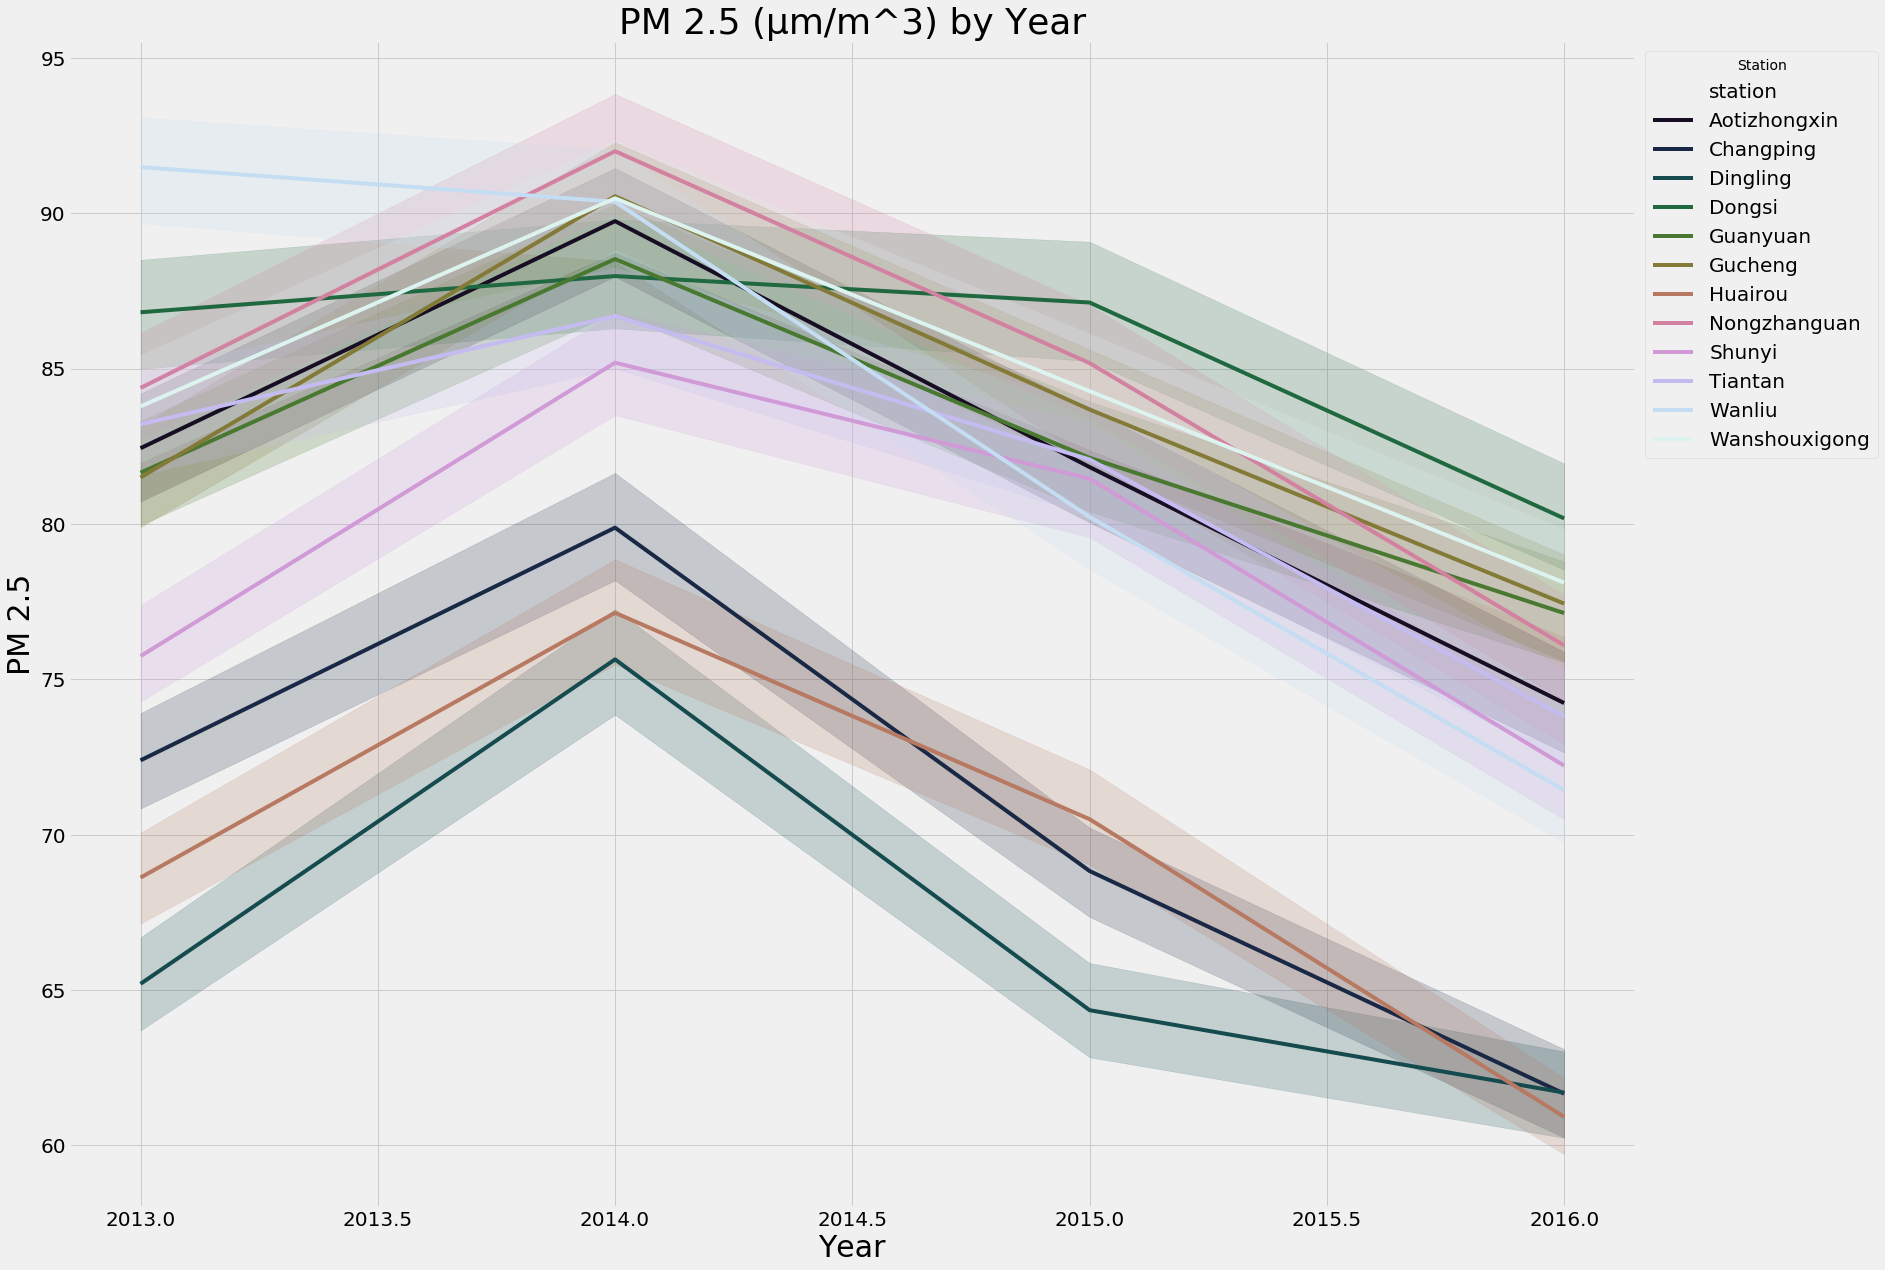

In [5]:
fig = plt.figure(figsize = (25,20))
sns.set_palette(sns.color_palette("cubehelix", n_colors=12))
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "year", y = "PM2.5", data = time, hue = 'station', dashes = False, markers = ["o", "<", ">", "^"])
 
plt.title("PM 2.5 (μm/m^3) by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(title='Station', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 20)
plt.show()

fig.savefig('PNG/PM25_year_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

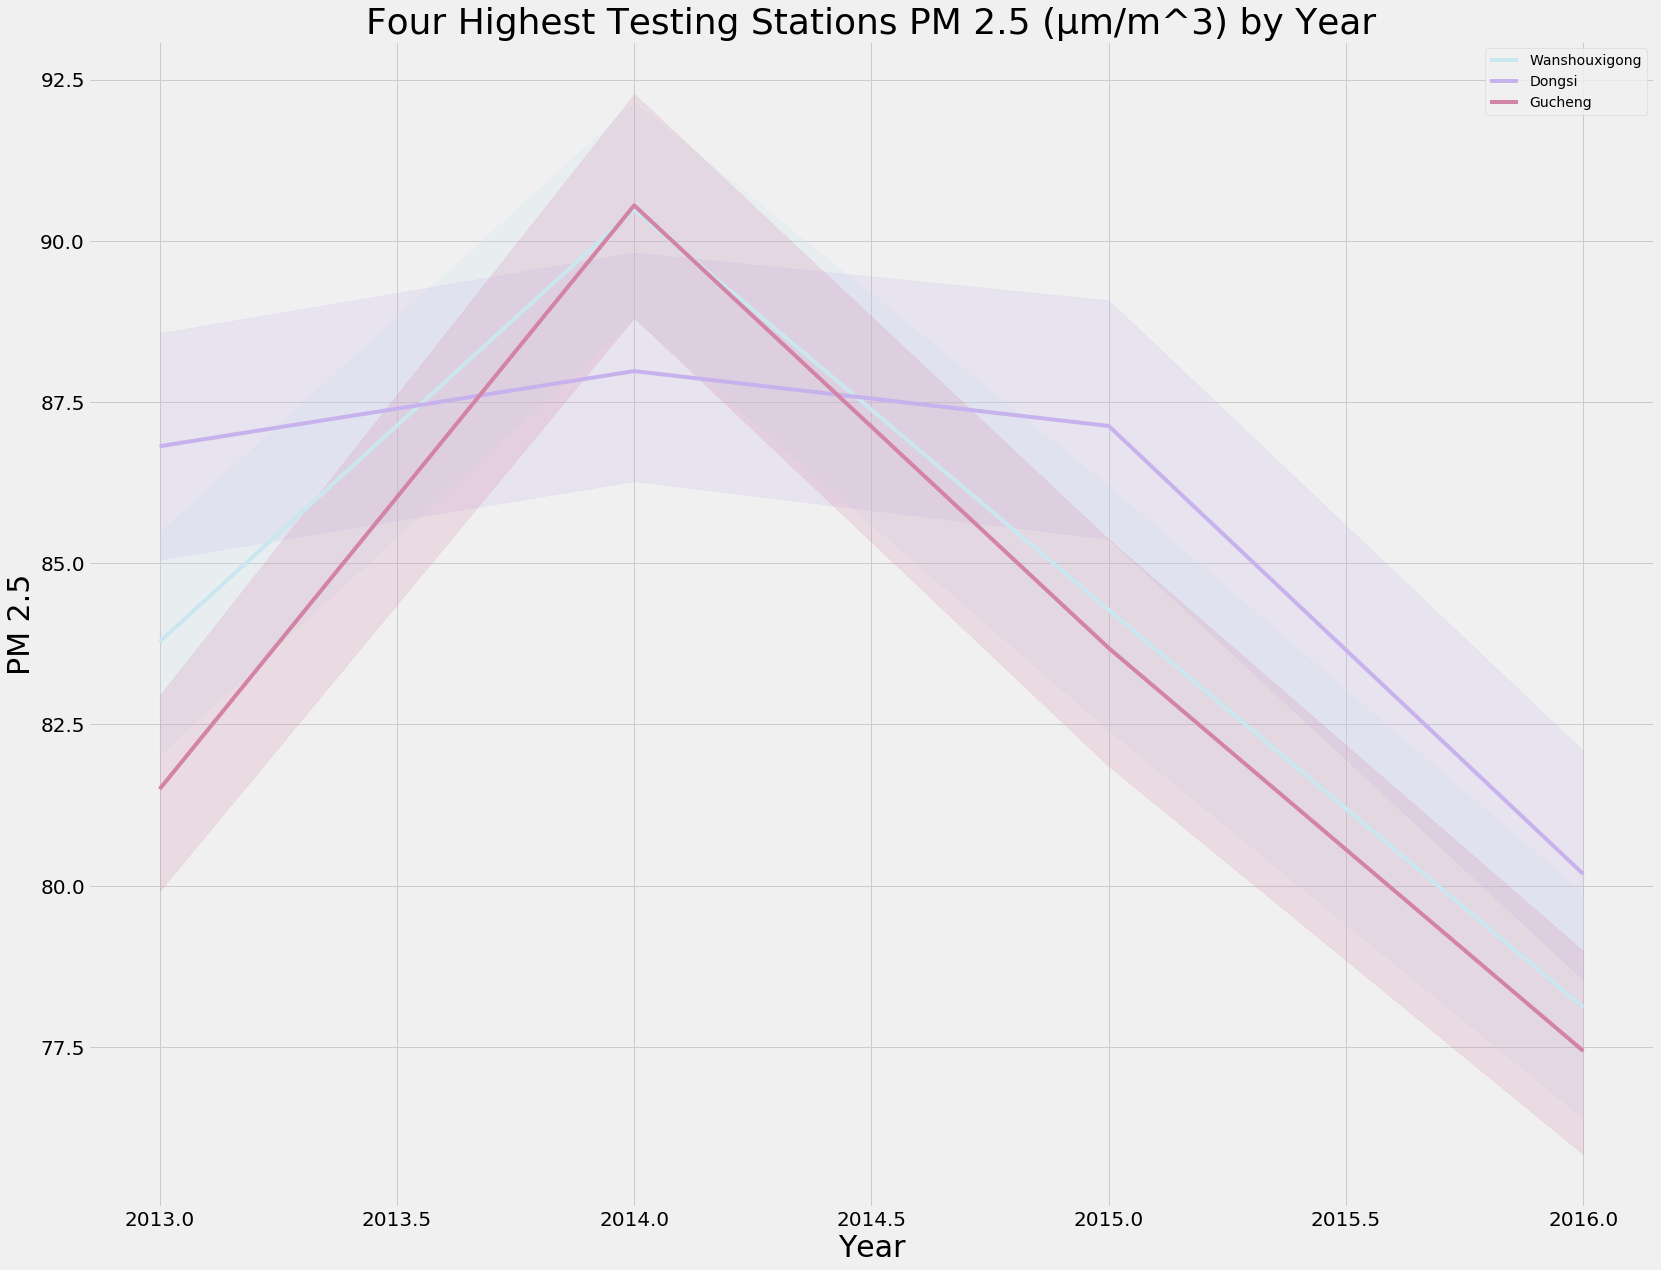

In [6]:
sns.set_palette(sns.color_palette("cubehelix_r", n_colors=7))
fig = plt.figure(figsize = (25,20))

sns.lineplot(x = "year", y = "PM2.5", data = time_Wanshouxigong, dashes = False, markers = ["o", "<", ">", "^"], label = 'Wanshouxigong')
sns.lineplot(x = "year", y = "PM2.5", data = time_Dongsi, dashes = False, markers = ["o", "<", ">", "^"], label = 'Dongsi')
sns.lineplot(x = "year", y = "PM2.5", data = time_Gucheng, dashes = False, markers = ["o", "<", ">", "^"], label = 'Gucheng')
sns.lineplot(x = "year", y = "PM2.5", data = time_Nongzhanguan, dashes = False, markers = ["o", "<", ">", "^"], label = 'Nongzhanguan')


plt.title("Four Highest Testing Stations PM 2.5 (μm/m^3) by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend()
plt.show()

fig.savefig('PNG/PM25_high_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

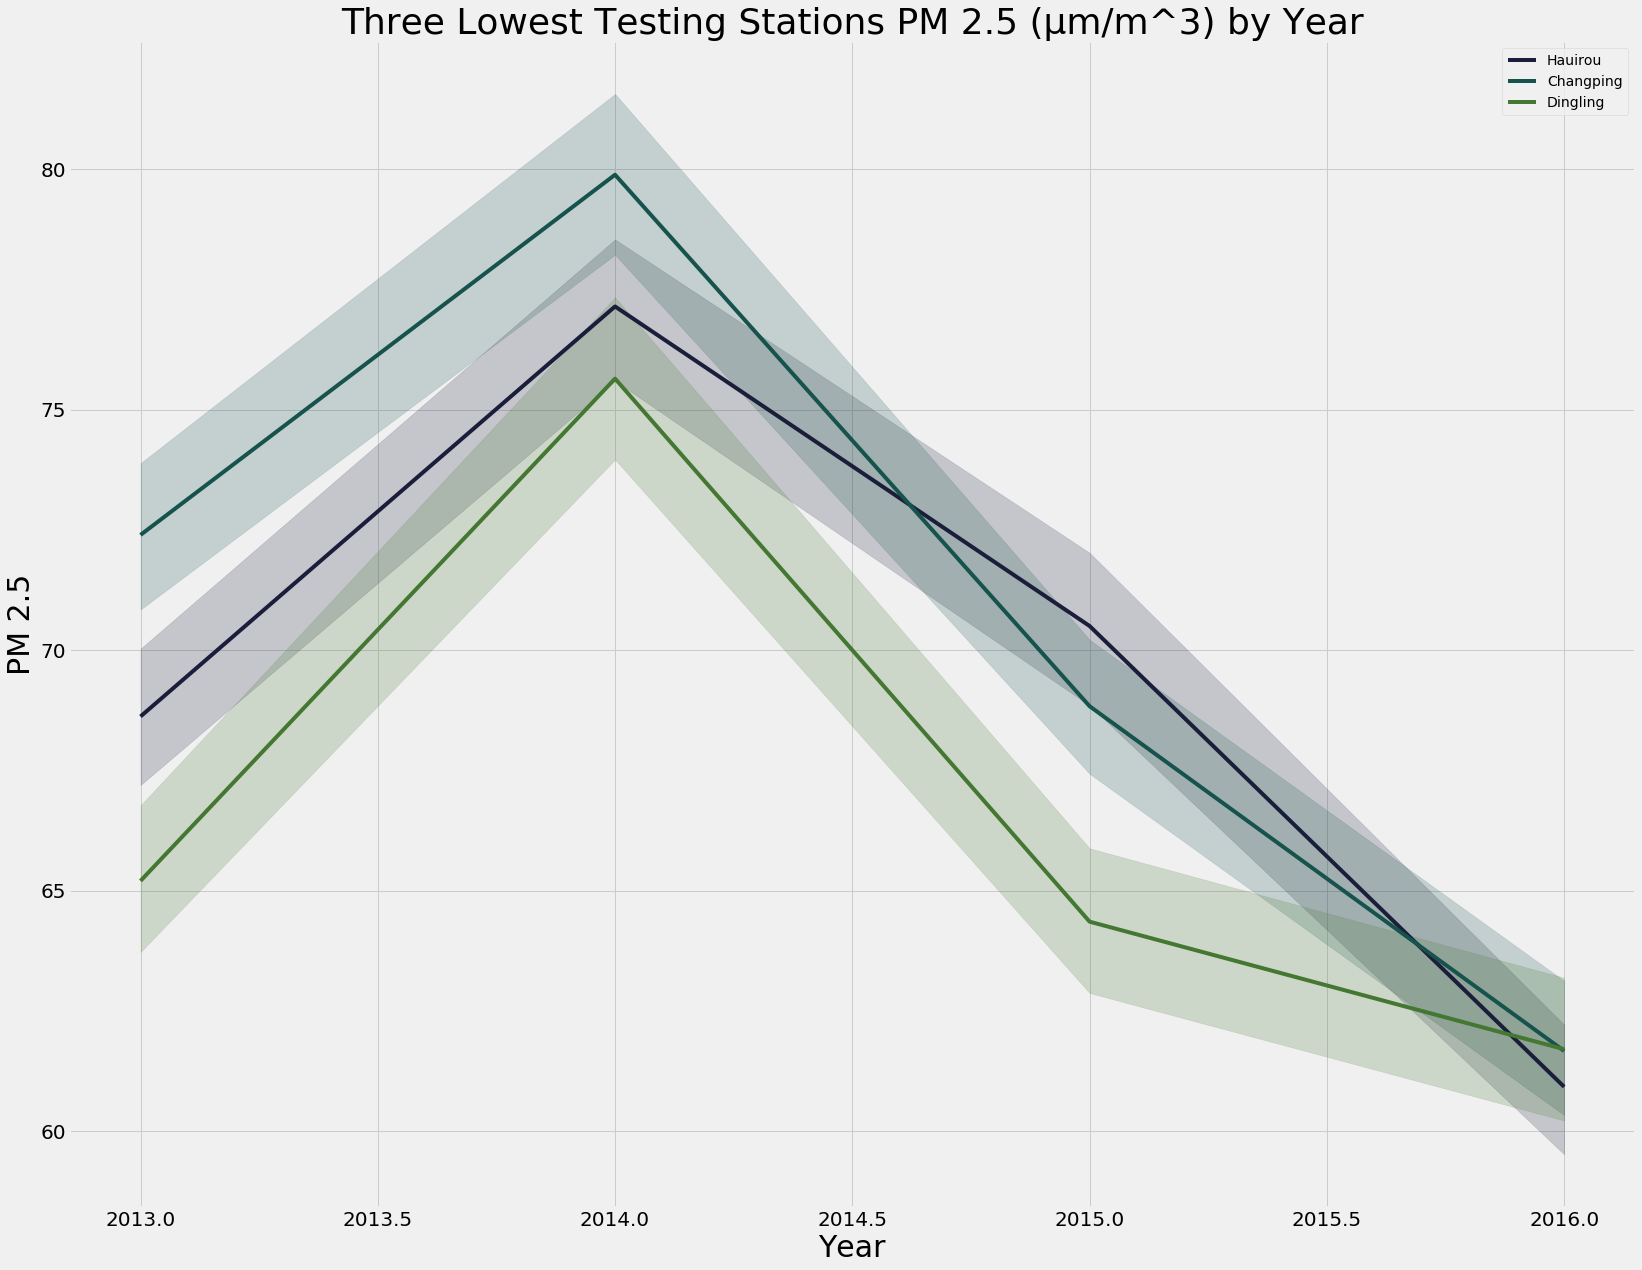

In [7]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=7))
fig = plt.figure(figsize = (25,20))

# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "year", y = "PM2.5", data = time_Huairou, dashes = False, markers = ["o", "<", ">", "^"], label = 'Hauirou')
sns.lineplot(x = "year", y = "PM2.5", data = time_Changping, dashes = False, markers = ["o", "<", ">", "^"], label = 'Changping')
sns.lineplot(x = "year", y = "PM2.5", data = time_Dingling, dashes = False, markers = ["o", "<", ">", "^"], label = 'Dingling')



plt.title("Three Lowest Testing Stations PM 2.5 (μm/m^3) by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend()
plt.show()

fig.savefig('PNG/PM25_low_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

## All Stations/Sites Combined Mean Plotted 

In [6]:
time3 = time.resample('Y').mean()

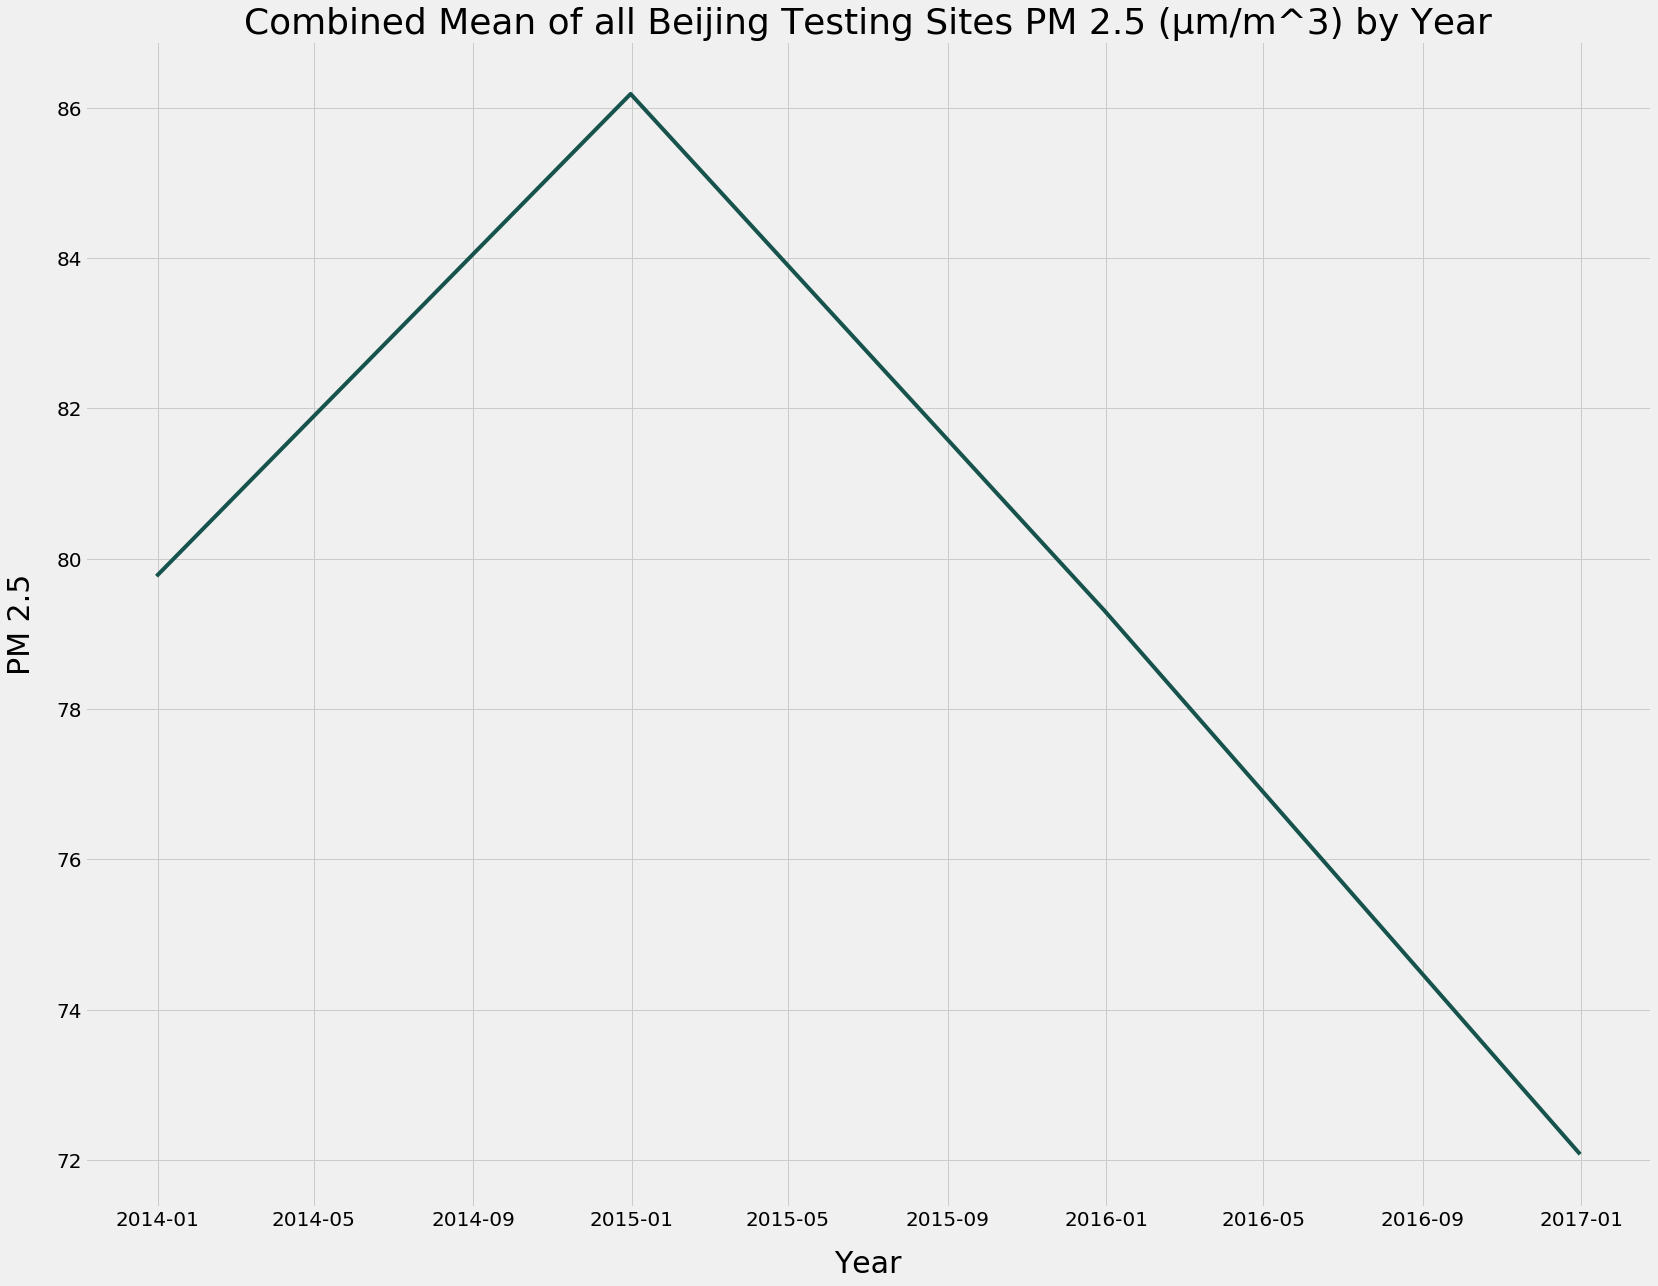

In [7]:
fig = plt.figure(figsize = (25,20))
sns.set_palette(sns.color_palette("cubehelix", n_colors=3))
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = time3.index, y = "PM2.5", data = time3, dashes = False, markers = ["o", "<", ">", "^"])
 
plt.title("Combined Mean of all Beijing Testing Sites PM 2.5 (μm/m^3) by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30, labelpad = 20)
plt.ylabel("PM 2.5", fontsize = 30, labelpad = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

fig.savefig('PNG/PM25_year_combined_mean.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

## Resampled to be daily across all testing sites

In [8]:
time2 = time.resample('D').mean()

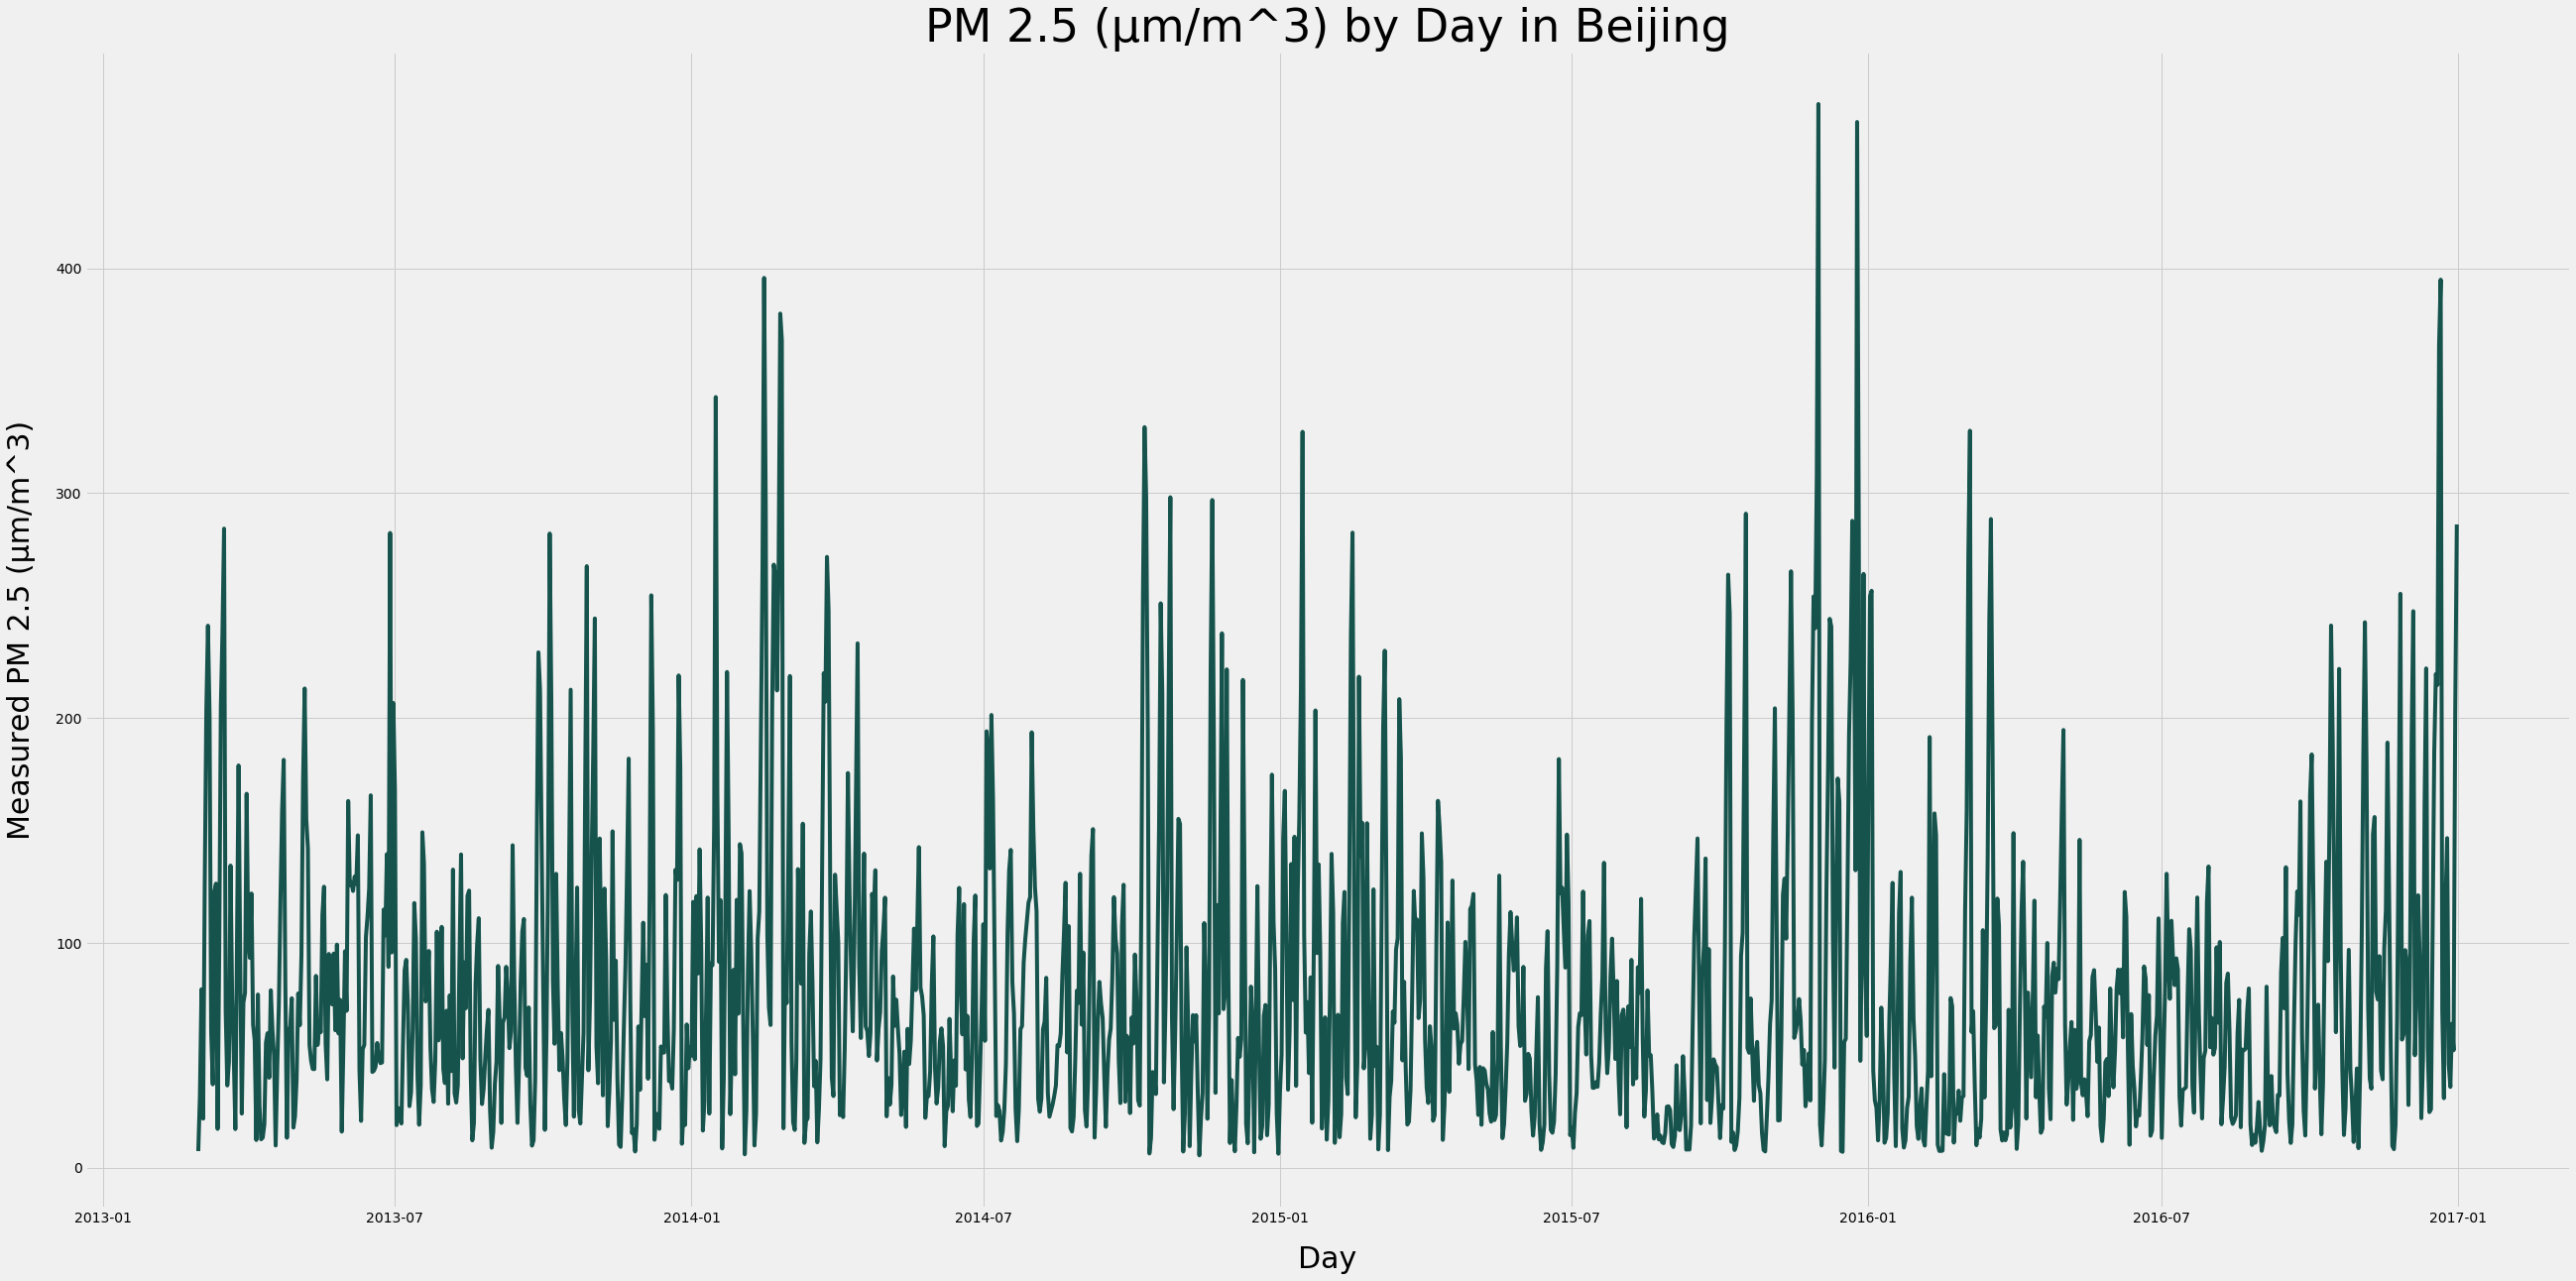

In [9]:
fig, ax = plt.subplots(figsize=(40, 20))
sns.lineplot(x = time2.index, y = 'PM2.5', data = time2);
plt.xlabel('Day', fontsize = 30, labelpad = 20)
plt.ylabel('Measured PM 2.5 (μm/m^3)', fontsize = 30, labelpad = 20)
plt.title('PM 2.5 (μm/m^3) by Day in Beijing', fontsize = 46);

fig.savefig('PNG/Daily_Combined_Beijing.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Monthly Look at PM2.5 shown with Hazard Levels

We compared monthly and split the graph by hazard levels of the PM 2.5 levels. 
It seems Beijing spends most of it's time in the "Unhealthy" catergory, expecially in Q4 where there may be more holidays and travel contributing to the high levels of particulate matter. 

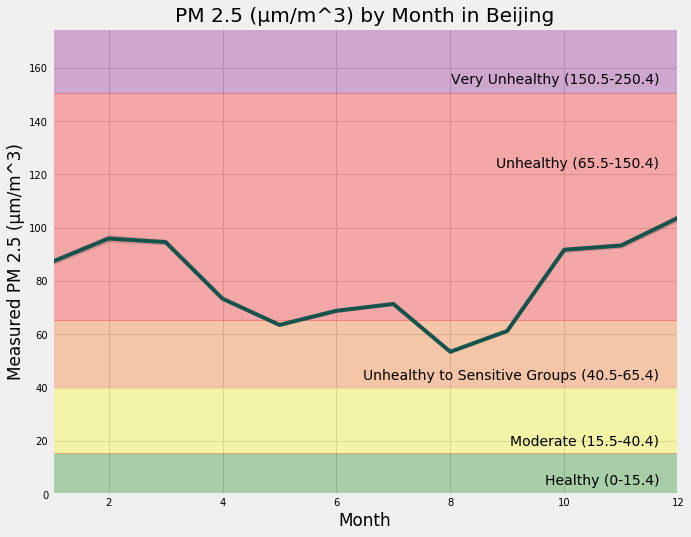

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x = 'month', y = 'PM2.5', data = time);
ax.set(xlabel='Month',
       ylabel='Measured PM 2.5 (μm/m^3)',
       title='PM 2.5 (μm/m^3) by Month in Beijing',
       xlim=[1, 12],ylim=[0,175])

plt.xticks(size = 10)
plt.yticks(size = 10)

fill([0,12,12,0], [0,0,15.4,15.4], 'green', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [15.5,15.5,40.4,40.4], 'yellow', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [40.5,40.5,65.4,65.4], '#ff6500', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [65.5,65.5,150.4,150.4], 'red', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [150.5,150.5,250.4,250.4], 'purple', alpha=0.3, edgecolor='r')
fill([0,12,12,0], [250.5,250.5,500.4,500.4], 'brown', alpha=0.3, edgecolor='r')

ax.annotate('Very Unhealthy (150.5-250.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.905), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Unhealthy (65.5-150.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.725), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Unhealthy to Sensitive Groups (40.5-65.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.27), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Moderate (15.5-40.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.13), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('Healthy (0-15.4)',color = 'k',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.045), textcoords='axes fraction',
            #arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
fig.savefig('PNG/PM25_month_fill.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

# Distributions

We looked at the distributions as normally ditrubuted data works better (central limit theorem). 

## PM2.5 

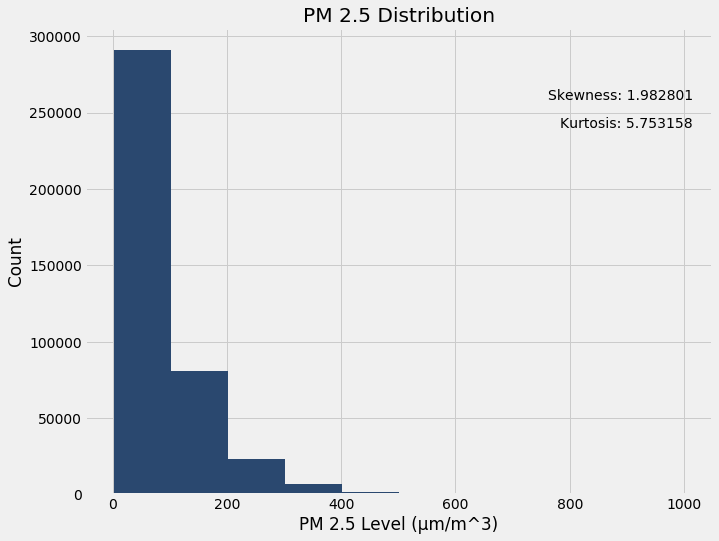

In [31]:
# Non normal distribution

fig,ax = plt.subplots(figsize = (10,8))
time['PM2.5'].plot.hist()
ax.annotate("Skewness: %f" % ((time['PM2.5'])).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % ((time['PM2.5'])).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.set( xlabel='PM 2.5 Level (μm/m^3)', ylabel='Count',
       title='PM 2.5 Distribution')
fig.savefig('PNG/dist.png', bbox_inches= 'tight', padding_inches = 4, transparent = True);


## Log of PM2.5
We will be using the log of PM2.5 to run our models. 

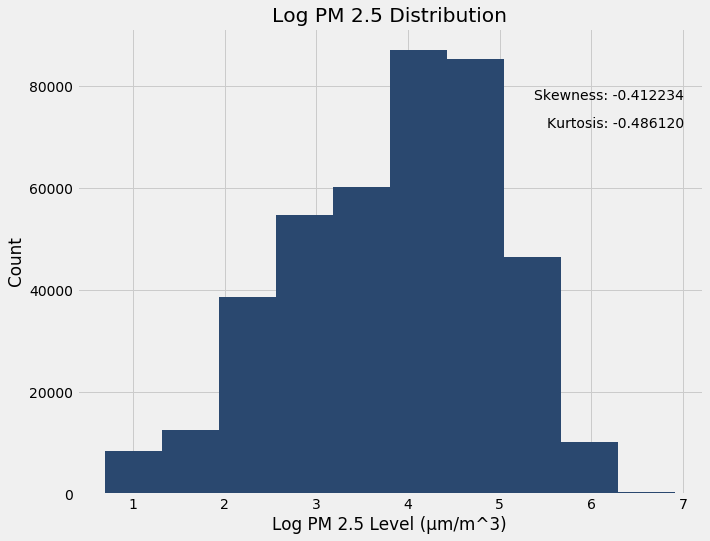

In [29]:
# Using the log of PM2.5, it now has a more normal distribution
# This tends to help in time series

fig,ax = plt.subplots(figsize = (10,8))
np.log(time['PM2.5']).plot.hist()
ax.annotate("Skewness: %f" % (np.log(time['PM2.5'])).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (np.log(time['PM2.5'])).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.set( xlabel='Log PM 2.5 Level (μm/m^3)', ylabel='Count',
       title='Log PM 2.5 Distribution')
fig.savefig('PNG/log_dist.png', bbox_inches= 'tight', padding_inches = 4, transparent = True);

# Dickey-Fuller Test and Testing for Stationarity

Setting up the sample, we can see that the monthly series is stationary as per the Dickey Fuller p-value of 0.000. 


## Visualizing Monthly Stationarity

Before we run the numbers, we like to eyeball the stationarity. 

In [13]:
time.set_index('Date', inplace = True)

In [14]:
time_monthly = time.resample('MS').mean()
time_monthly.shape

(46, 15)

In [15]:
monthly_series = time_monthly['PM2.5']

roll_mean = monthly_series.rolling(window = 3).mean()
roll_std = monthly_series.rolling(window = 3).std()

PM25_lag_1 = monthly_series.shift(periods=1)
PM25_lag_2 = monthly_series.shift(periods=2)

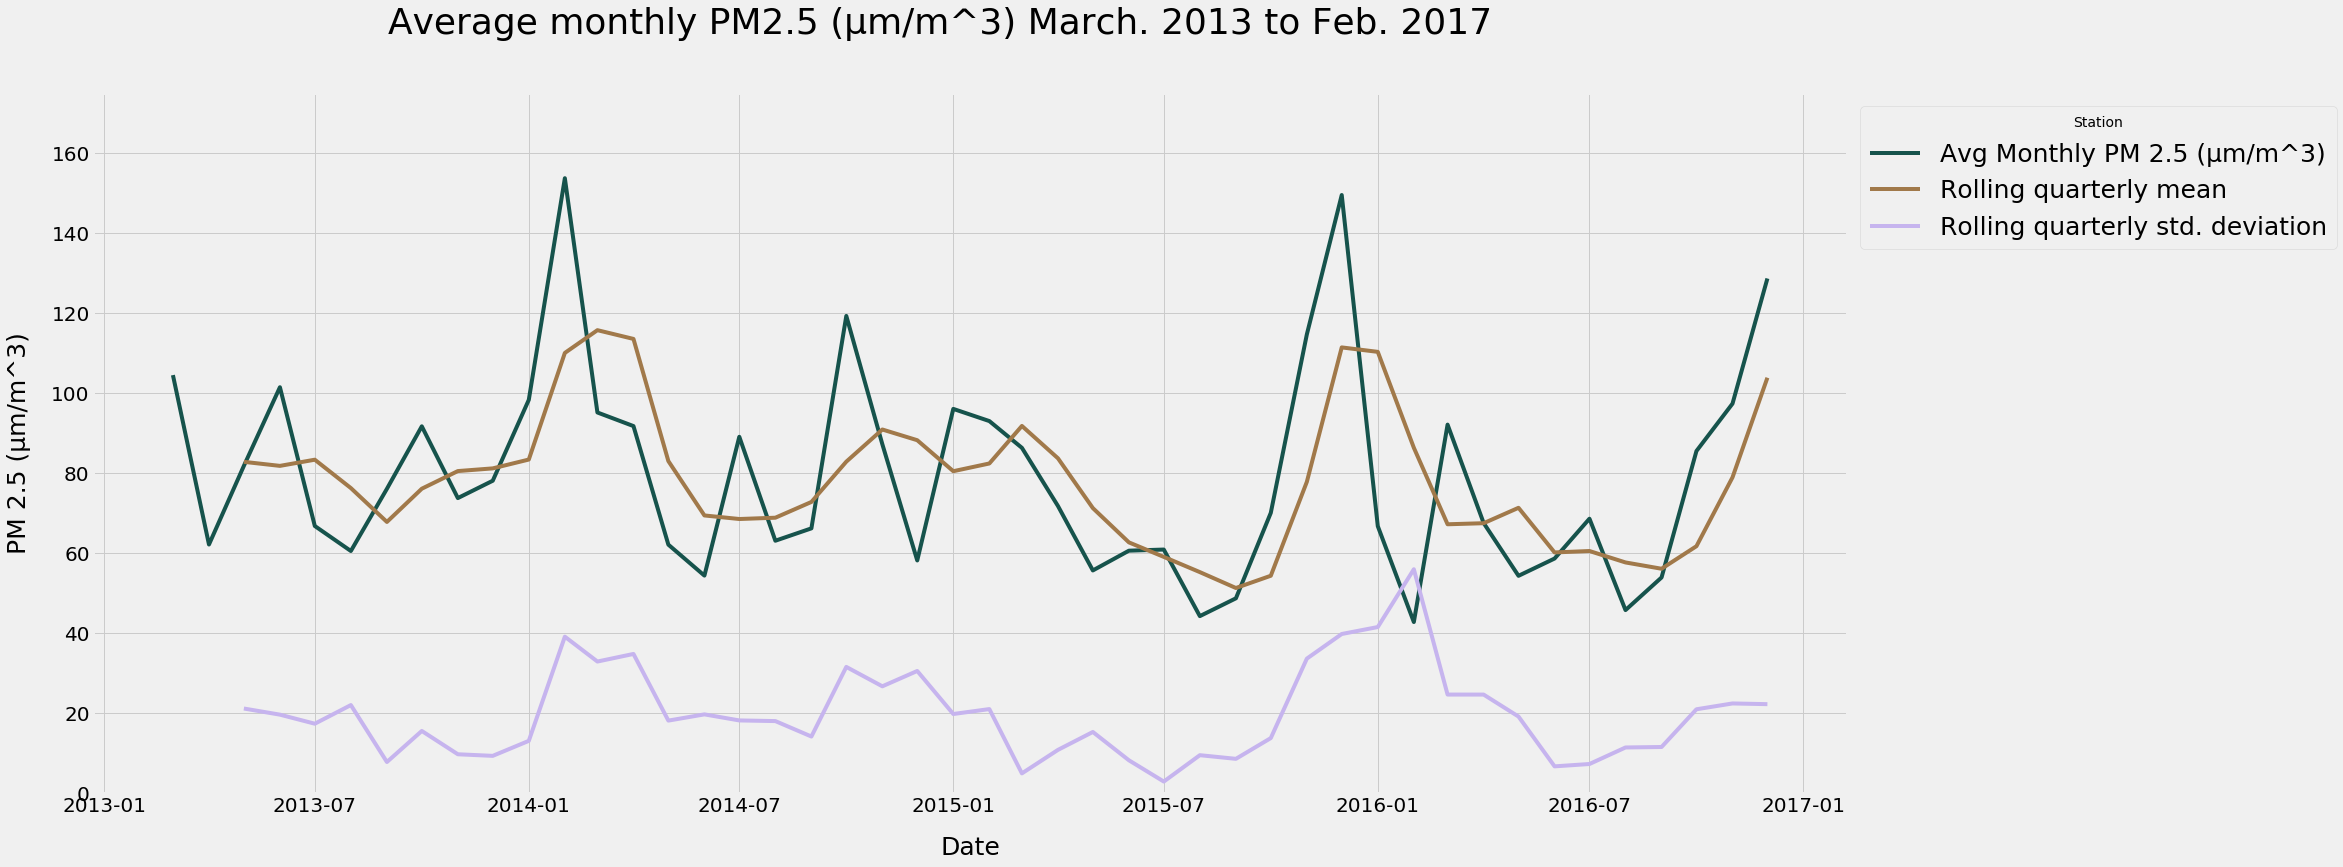

In [16]:
fig, ax = plt.subplots(figsize=(28,12))
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 30, n= 4))

ax.plot(monthly_series,label='Avg Monthly PM 2.5 (μm/m^3)')
ax.plot(roll_mean, label='Rolling quarterly mean')
ax.plot(roll_std, label='Rolling quarterly std. deviation')
ax.set_ylim(0, 175)

plt.xticks(size = 20)
plt.yticks(size = 20)

plt.xlabel('Date', fontsize = 25, labelpad=20)
plt.ylabel('PM 2.5 (μm/m^3)', fontsize = 25, labelpad=20)
plt.legend(title='Station', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 25)
fig.suptitle('Average monthly PM2.5 (μm/m^3) March. 2013 to Feb. 2017', fontsize = 36)

fig.savefig('PNG/series_monthly_PM25.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

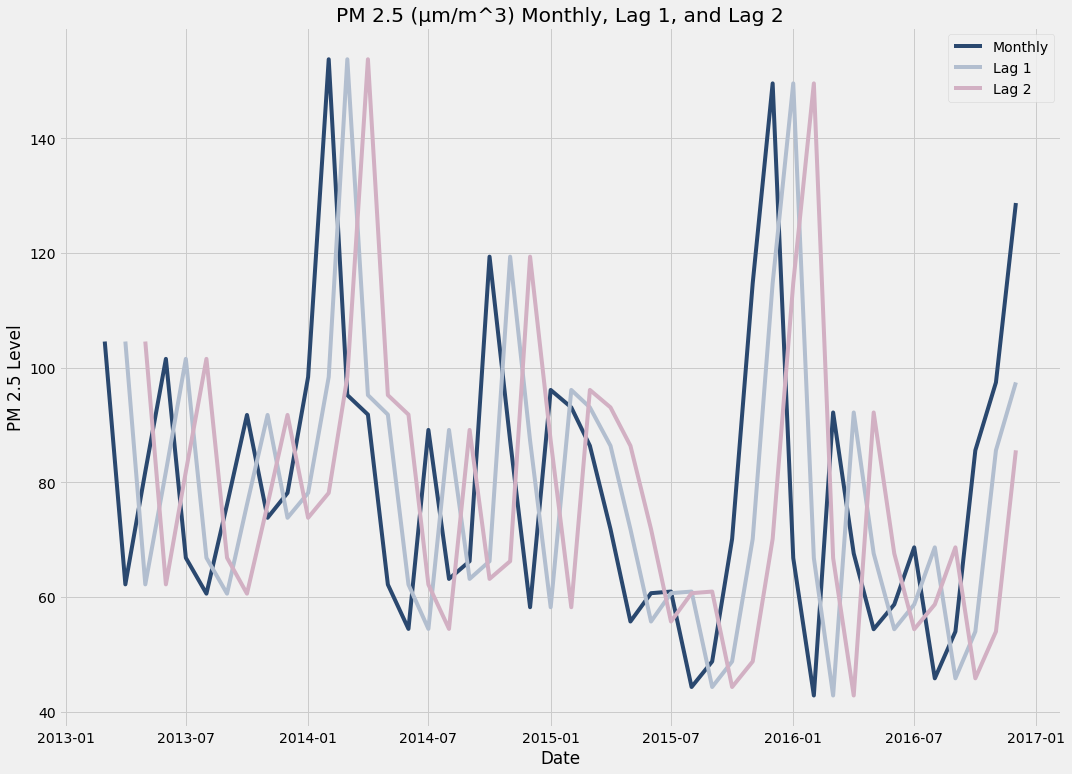

In [17]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(monthly_series, label = 'Monthly')
plt.plot(PM25_lag_1, label = 'Lag 1')
plt.plot(PM25_lag_2, label = 'Lag 2')

plt.title('PM 2.5 (μm/m^3) Monthly, Lag 1, and Lag 2')
plt.xlabel('Date')
plt.ylabel('PM 2.5 Level')

plt.legend()

fig.savefig('PNG/lag1_2.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Visualizing Daily Stationarity
Looking at the daily graph, this looks pretty stationary. 

In [18]:
time_daily = time.resample('D').mean()
time_daily.shape

(1402, 15)

In [19]:
daily_series = time_daily['PM2.5']

roll_mean = daily_series.rolling(window = 7).mean()
roll_std = daily_series.rolling(window = 7).std()

PM25_lag_3 = daily_series.shift(periods=1)
PM25_lag_4 = daily_series.shift(periods=2)

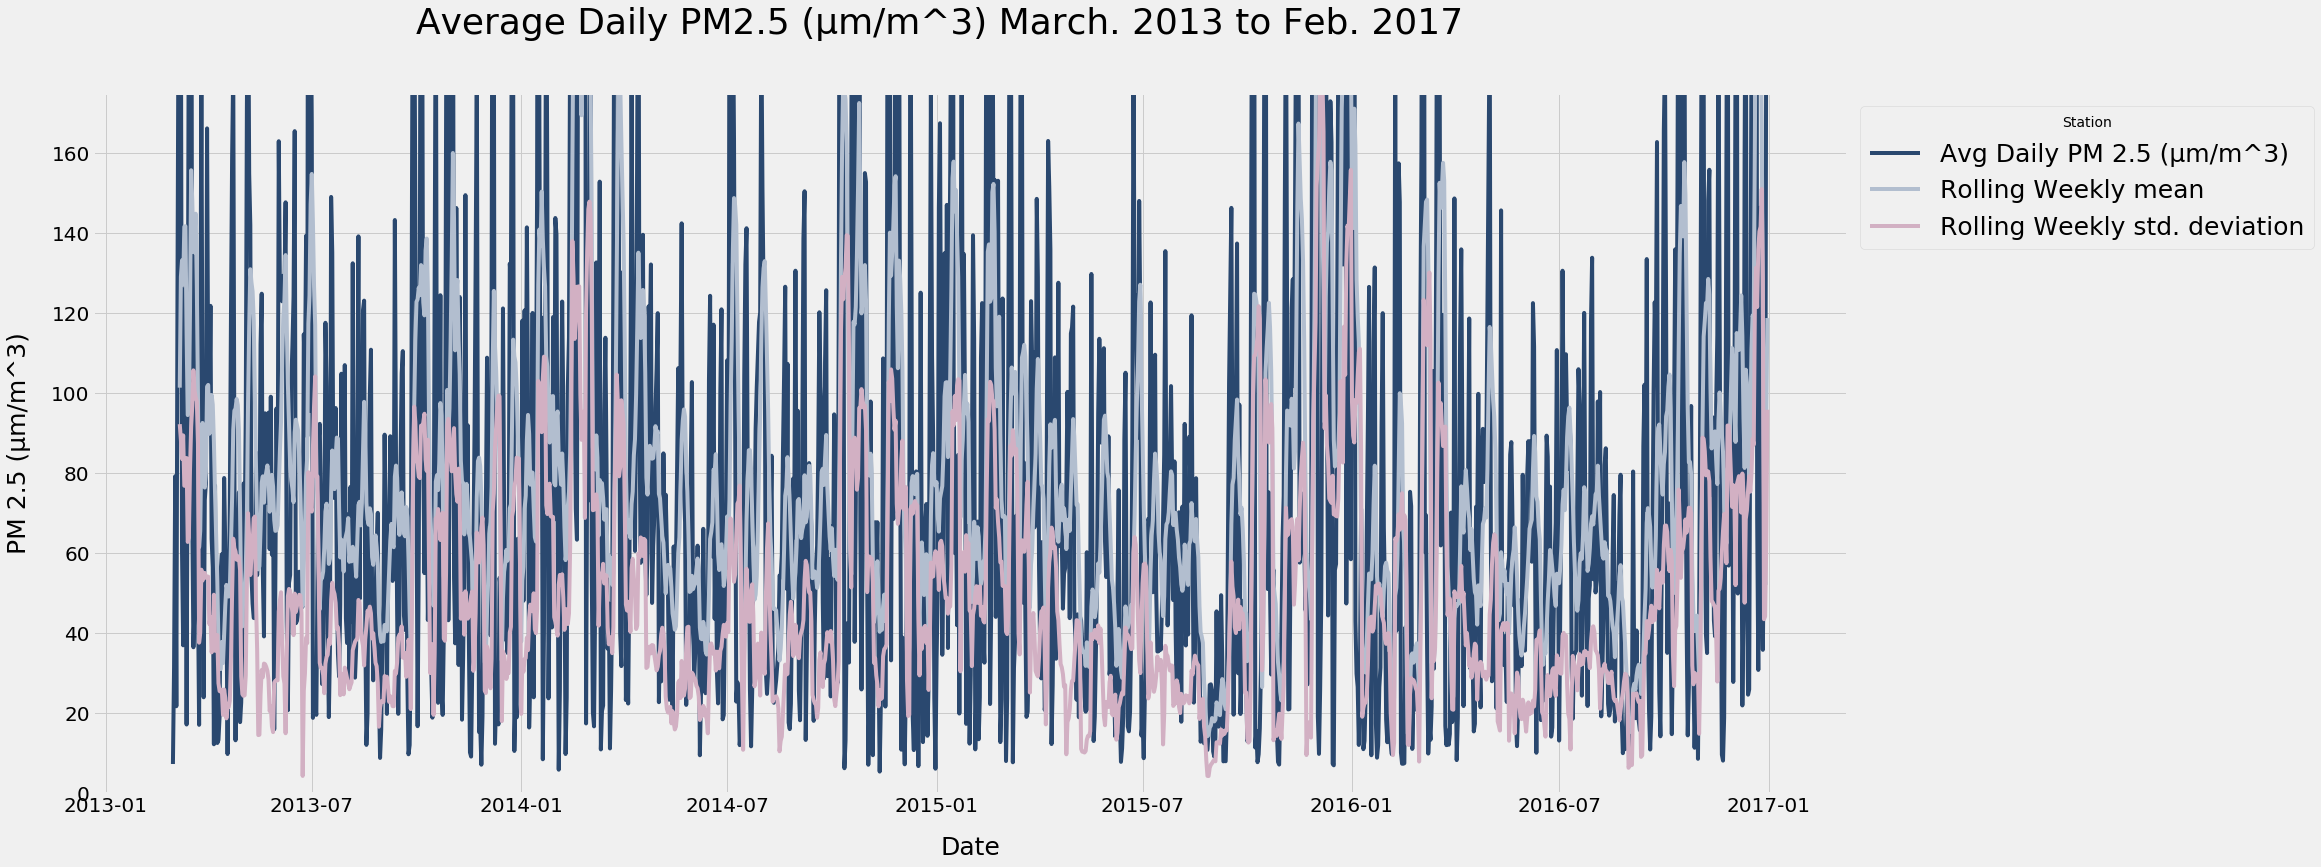

In [20]:
fig, ax = plt.subplots(figsize=(28,12))
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 30, n= 4))

ax.plot(daily_series,label='Avg Daily PM 2.5 (μm/m^3)')
ax.plot(roll_mean, label='Rolling Weekly mean')
ax.plot(roll_std, label='Rolling Weekly std. deviation')
ax.set_ylim(0, 175)

plt.xticks(size = 20)
plt.yticks(size = 20)

plt.xlabel('Date', fontsize = 25, labelpad=20)
plt.ylabel('PM 2.5 (μm/m^3)', fontsize = 25, labelpad=20)
plt.legend(title='Station', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 25)
fig.suptitle('Average Daily PM2.5 (μm/m^3) March. 2013 to Feb. 2017', fontsize = 36)

fig.savefig('PNG/series_daily_PM25.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

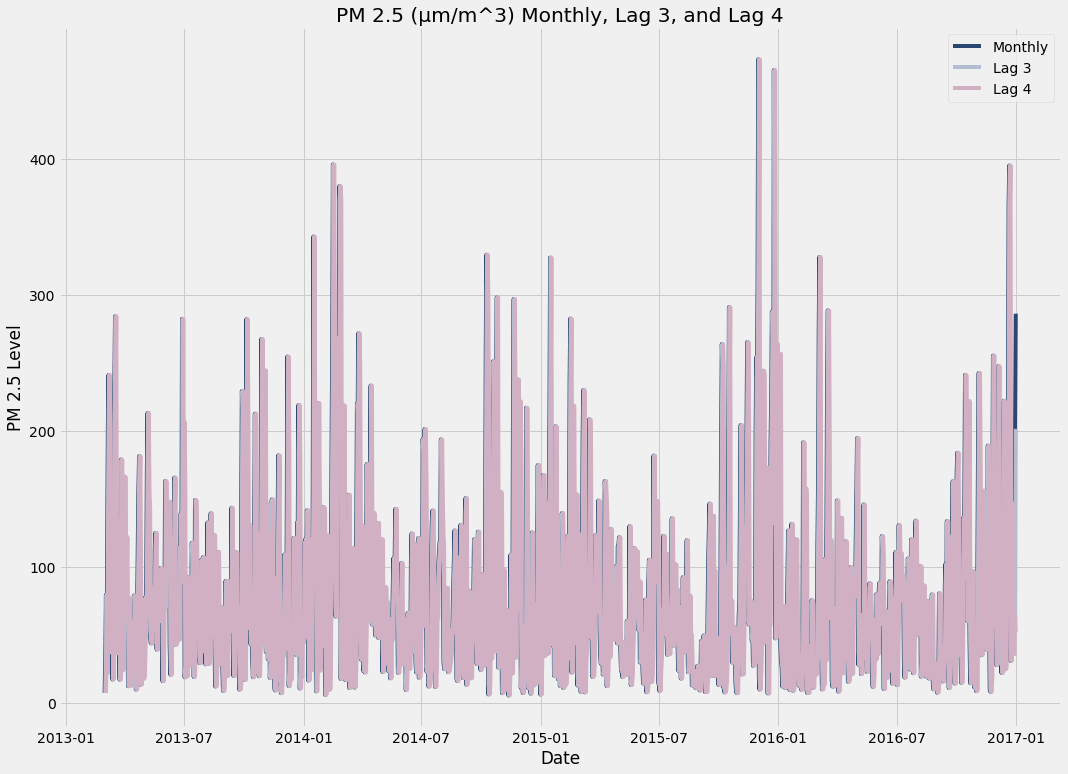

In [21]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(daily_series, label = 'Monthly')
plt.plot(PM25_lag_3, label = 'Lag 3')
plt.plot(PM25_lag_4, label = 'Lag 4')

plt.title('PM 2.5 (μm/m^3) Monthly, Lag 3, and Lag 4')
plt.xlabel('Date')
plt.ylabel('PM 2.5 Level')

plt.legend()

fig.savefig('PNG/lag3_4.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Checking the Numbers for Stationarity

The un-modified distributions of the monthly and daily series shows stationarity. 


In [22]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(monthly_series)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                 -4.590783
p-value                         0.000134
#Lags Used                      1.000000
Number of Observations Used    44.000000
dtype: float64


In [23]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(daily_series)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -1.067859e+01
p-value                        3.994131e-19
#Lags Used                     7.000000e+00
Number of Observations Used    1.394000e+03
dtype: float64


## Visualizing of the Log of PM2.5 (Daily)

Since we will be running our models with the log on a daily basis, we will check to make sure it is also stationary. 
(It should be, and it is)

In [24]:
time_daily['PM2.5'] = np.log(time_daily['PM2.5'])

In [25]:
daily_series = time_daily['PM2.5']

roll_mean = daily_series.rolling(window = 7).mean()
roll_std = daily_series.rolling(window = 7).std()

PM25_lag_5 = daily_series.shift(periods=1)
PM25_lag_6 = daily_series.shift(periods=2)

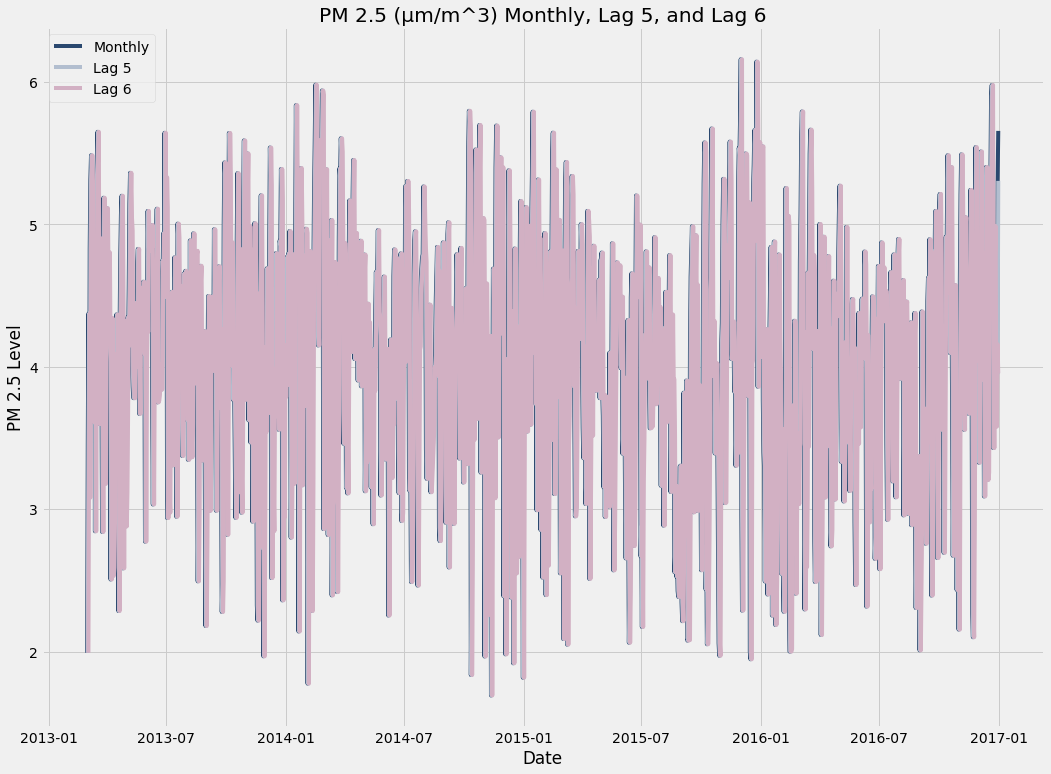

In [26]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.plot(daily_series, label = 'Monthly')
plt.plot(PM25_lag_5, label = 'Lag 5')
plt.plot(PM25_lag_6, label = 'Lag 6')

plt.title('PM 2.5 (μm/m^3) Monthly, Lag 5, and Lag 6')
plt.xlabel('Date')
plt.ylabel('PM 2.5 Level')

plt.legend()

fig.savefig('PNG/lag5_6.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

In [27]:
# This is the Log PM2.5 Daily Series, not to be confused with daily series above 

from statsmodels.tsa.stattools import adfuller
test = adfuller(daily_series)
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -21.94404
p-value                           0.00000
#Lags Used                        1.00000
Number of Observations Used    1400.00000
dtype: float64


## As we can see the log of the daily series is also stationary, and more normally distributed. 

Now we can move on to modeling. 